In [ ]:
install.packages('patchwork')
install.packages('caret')
install.packages("ggpubr")

In [ ]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(lubridate)
  library(patchwork)
  library(caret)
  library(ggpubr)

})


# Demonstration on building a calibrated Soil Moisture Retrival Model based on Cosmic-Ray Neutron Sensor (CRNS) and Earth Observation microwave C-Band Sentinel-1

### Introduction

we will work on step by step code on building a calibrated soil moisture conversion model using microwave remote Sensing  with the C-band sentinel-1 in Bolivia where a Cosmic-Ray Neutron Sensor is Installed. 
You can direct Assess of the CRNS dataset in this link https://nearfld.com reguser/bolivia/#div1anchor .  we will use google http://colab.to/r  to run the script we will also use google earth engine to  process sentinel 1 data 


### Dataset
 #### *C-Band Microwave Remote Sensing*

Sentinel-1 Ground Range Detected is the first of the five missions that the European Space Agency (ESA) is developing for the Copernicus initiative. The S1 mission provides data from a dual-polarization C-band SAR instrument at 5.4 GHz. The S1  includes a constellation of two C-band SAR imaging polar-orbiting satellites, providing continuous radar mapping of the globe regardless of the weather. The C-band SAR has 6 days temporal resolution and covers the entire world’s landmasses for land monitoring, emergency response, climate change and security.  In both ascending and descending orbits, S1 data is collected using a variety of instrument configurations, resolutions, and band combinations (e.g., VV: single co-polarization, vertical transmit/vertical receive, or VV + VH: dual-band cross-polarization, vertical transmit/horizontal receive) 

#### *Cosmic-Ray Neutron Sensors CRNS*

The cosmic-ray neutron sensor is an advanced method that can estimate landscape average soil moisture, approximately 20ha by detecting hydrogen within soil H20 molecules. This helps fill the need for spatial soil moisture information left by common point-based sensors


In [ ]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
 fig(23,16)

# step 1 : process Cosmic-Ray neutron Sensor In-situ data

In [7]:

dn<-'/content/sample_data/crns.txt'
fn<-'/content/sample_data/VVboxcar20m.csv'

In [8]:
process_crns<-function(filepath){
  colvars<-c("UTC", "N1" ,"N2" , "P1","Battery",
             "H7","P4","T7", "NMcounts",
             "fbar","fhum","fsol", "VWC")
  df<- filepath %>%
    read.csv(comment.char="#")  %>%
    set_names(colvars) %>% 
    filter(VWC>0, VWC<=0.4) %>% 
    mutate(
      UTC=as.Date(UTC),
      Year=year(UTC),Year=year(UTC), Months=month(UTC, label = T))
  
  
  
}

## Function to change the plot size in google colab

In [40]:
df<-process_crns(dn)
head(df)

,UTC,N1,N2,P1,Battery,H7,P4,T7,NMcounts,fbar,fhum,fsol,VWC,Year,Months
,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,2023-01-19,14674,7925,0,12.2,84,580.9,0,153.03,0.984,1.022,1.039,0.278,2023,Jan
2,2023-01-19,14717,7984,0,22.8,96,581.2,0,153.03,0.986,1.025,1.039,0.270,2023,Jan
3,2023-01-19,14452,8106,0,10.1,97,581.4,0,153.03,0.988,1.025,1.039,0.287,2023,Jan
4,2023-01-19,14577,8086,0,11.5,96,581.7,0,153.03,0.990,1.025,1.039,0.275,2023,Jan
5,2023-01-19,14890,7884,0,6.4,96,582.0,0,153.03,0.992,1.025,1.039,0.252,2023,Jan
6,2023-01-19,14890,7644,0,12.8,94,582.6,0,153.03,0.997,1.025,1.039,0.247,2023,Jan


In [41]:
summary(df[,c(2,6,8,13)])

       N1              H7              T7              VWC        
 Min.   :13792   Min.   : 2.00   Min.   :-8.000   Min.   :0.0420  
 1st Qu.:15826   1st Qu.:31.00   1st Qu.: 0.000   1st Qu.:0.1590  
 Median :17040   Median :49.00   Median : 2.000   Median :0.1780  
 Mean   :16666   Mean   :49.82   Mean   : 2.519   Mean   :0.2108  
 3rd Qu.:17470   3rd Qu.:69.00   3rd Qu.: 6.000   3rd Qu.:0.2430  
 Max.   :19104   Max.   :98.00   Max.   :12.000   Max.   :0.4000  

# Visulize statistics of some important CRNS variables 

# step 2  Sentinel 1 time-serie datasets


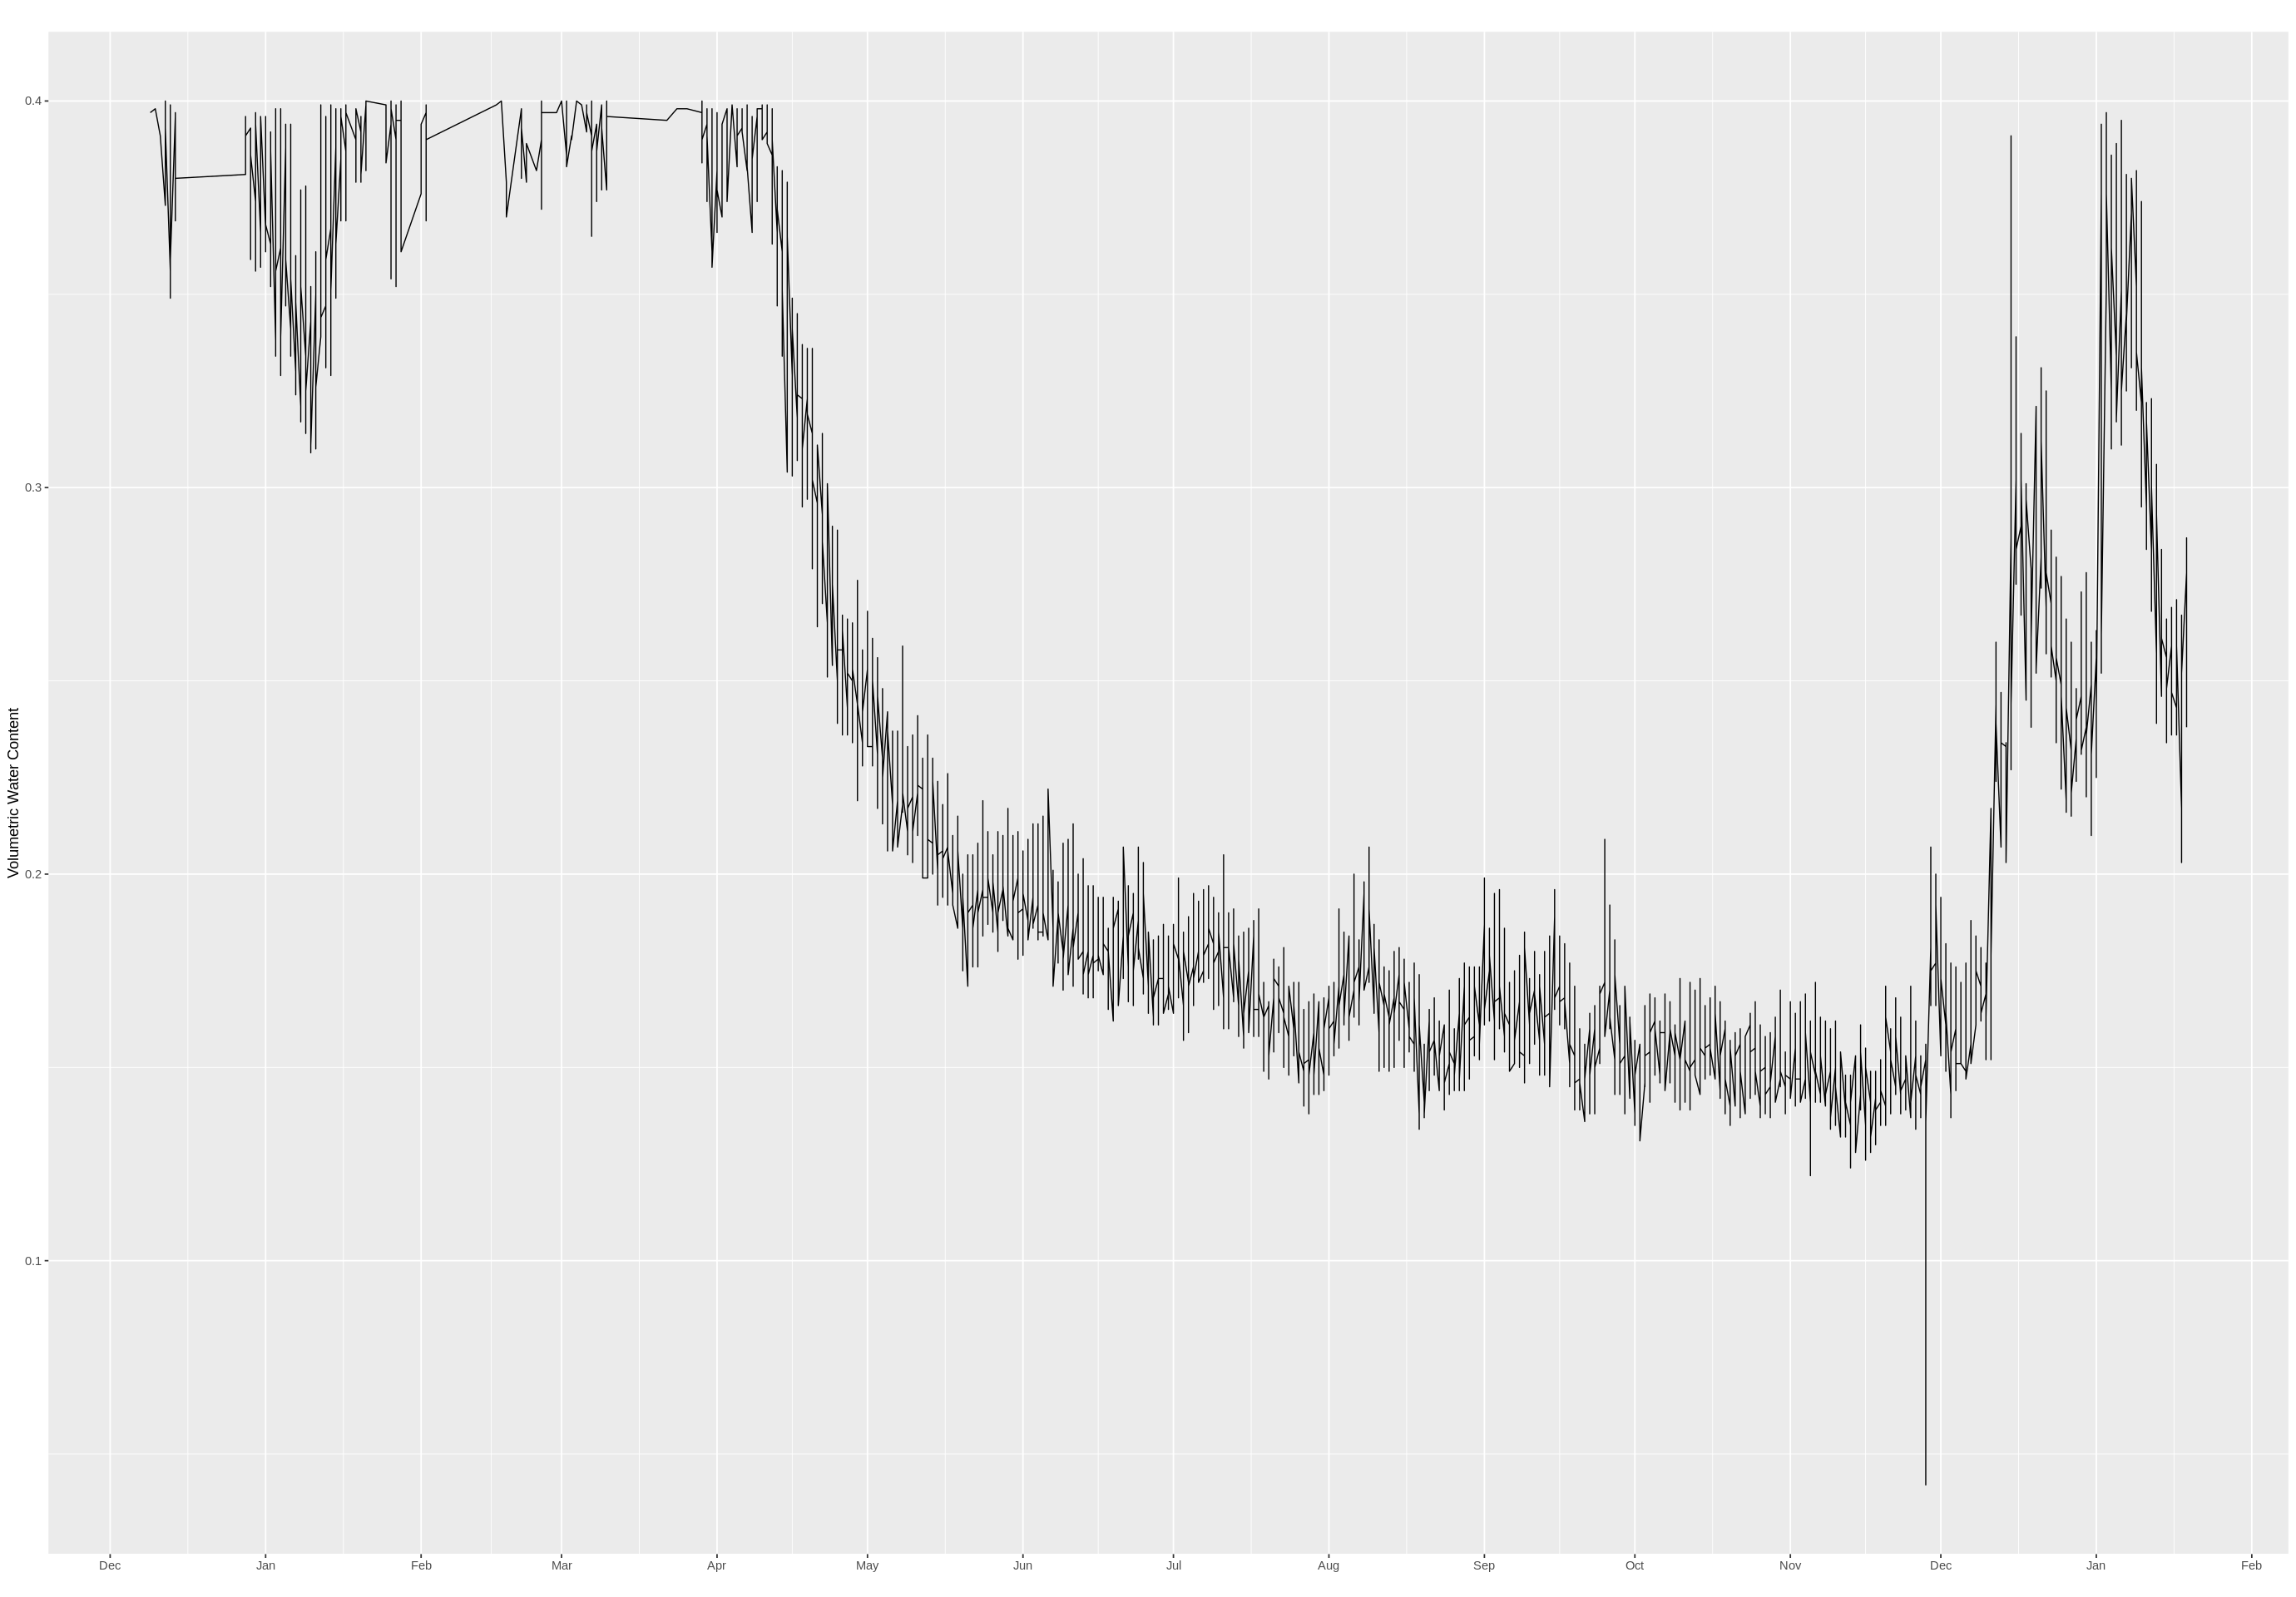

In [38]:
df %>% 
  ggplot(aes(x=UTC)) + 
  geom_line(aes(y=VWC), show.legend = F,linewidth=0.4) +
  scale_x_date(date_breaks = '1 month', date_labels = '%b')+
  labs(y='Volumetric Water Content',x='',title = '') ->p1


p1

In [17]:
myplots<-function(datasets,xx,yy){
          datasets %>% 
          # filter(Year %in% c(2022)) %>% 
          ggplot(aes({{xx}},{{yy}}))+
          geom_line(linewidth=0.5) +
          scale_x_date(date_breaks = '1 month', 
                       date_labels = '%m/%y')+
          geom_smooth(fill='#969696') +
          coord_cartesian(expand = T)
}



In [ ]:
p1<-myplots(df,UTC,N1)
p2<-myplots(df,UTC,N2)
p3<-myplots(df,UTC,T7)
p4<-myplots(df,UTC,fbar)
p5<-myplots(df,UTC,Battery)
p6<-myplots(df,UTC,VWC)

# visualizing time serie of important CRNS variables

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


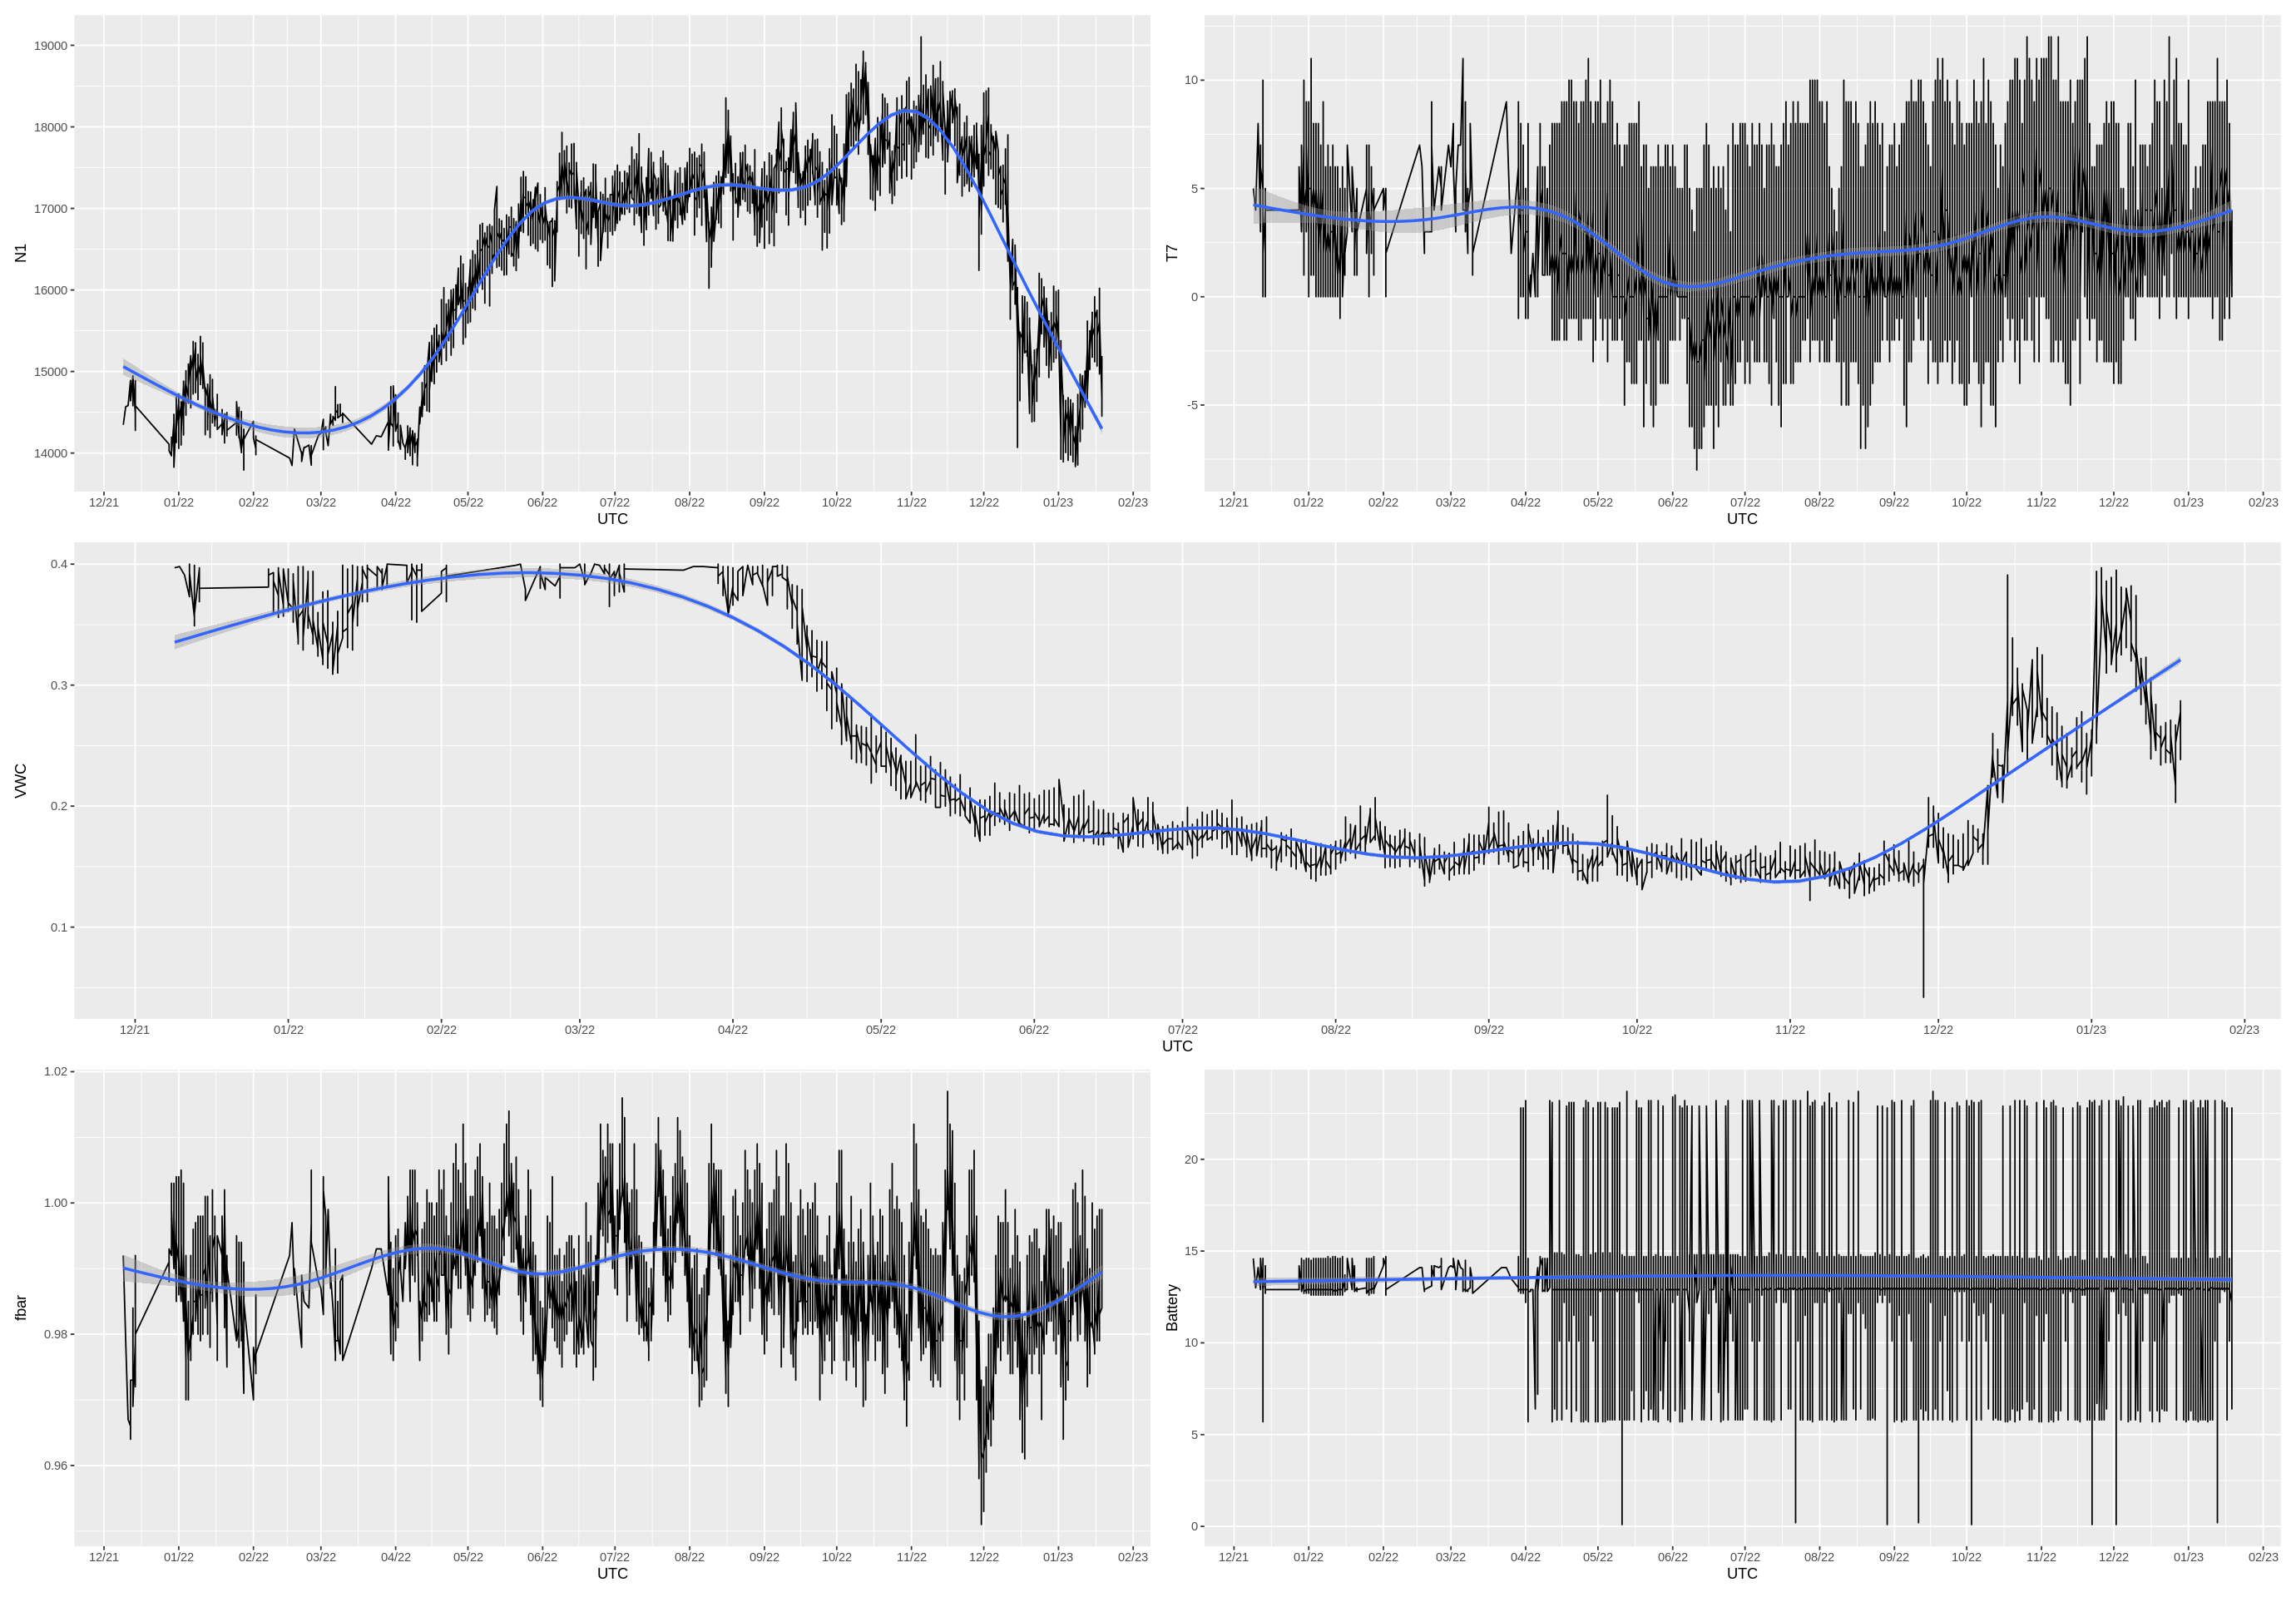

In [25]:
(p1|p3)/p6/(p4|p5)

In [26]:

process_radar<-function(filepath) {
  colvars<-c('UTC','VV')
  radar <-filepath %>% 
    read.csv() %>% 
    set_names(colvars) %>% 
    mutate(UTC=mdy(UTC)) 
  
}
# plots -----------------------------------------------------------------

# # Sentinel 1 Data  processing 


In [27]:
S1<-process_radar(fn)

In [28]:
crns<-df %>% 
  select(c(1:13)) %>% 
  group_by(UTC) %>%  
  summarise_all(mean) %>%  
  filter(VWC>0, VWC<=0.3)

In [29]:

p21<-myplots(crns,UTC,N1) + labs(x='', y='Neutron Counts (cph)')
p23<-myplots(crns,UTC,T7)+  labs(x='', y='Temperature °C ')
p24<-myplots(crns,UTC,fbar) +  labs(x='', y='Pression (Bar) ')
p25<-myplots(crns,UTC,Battery)+ labs(x='', y='Voltage (V) ')
p26<-myplots(crns,UTC,VWC)+  labs(x='', y=bquote('Volumetric Water Content'~m^3/m^3))

# Vizualisation of CRNS Variables

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


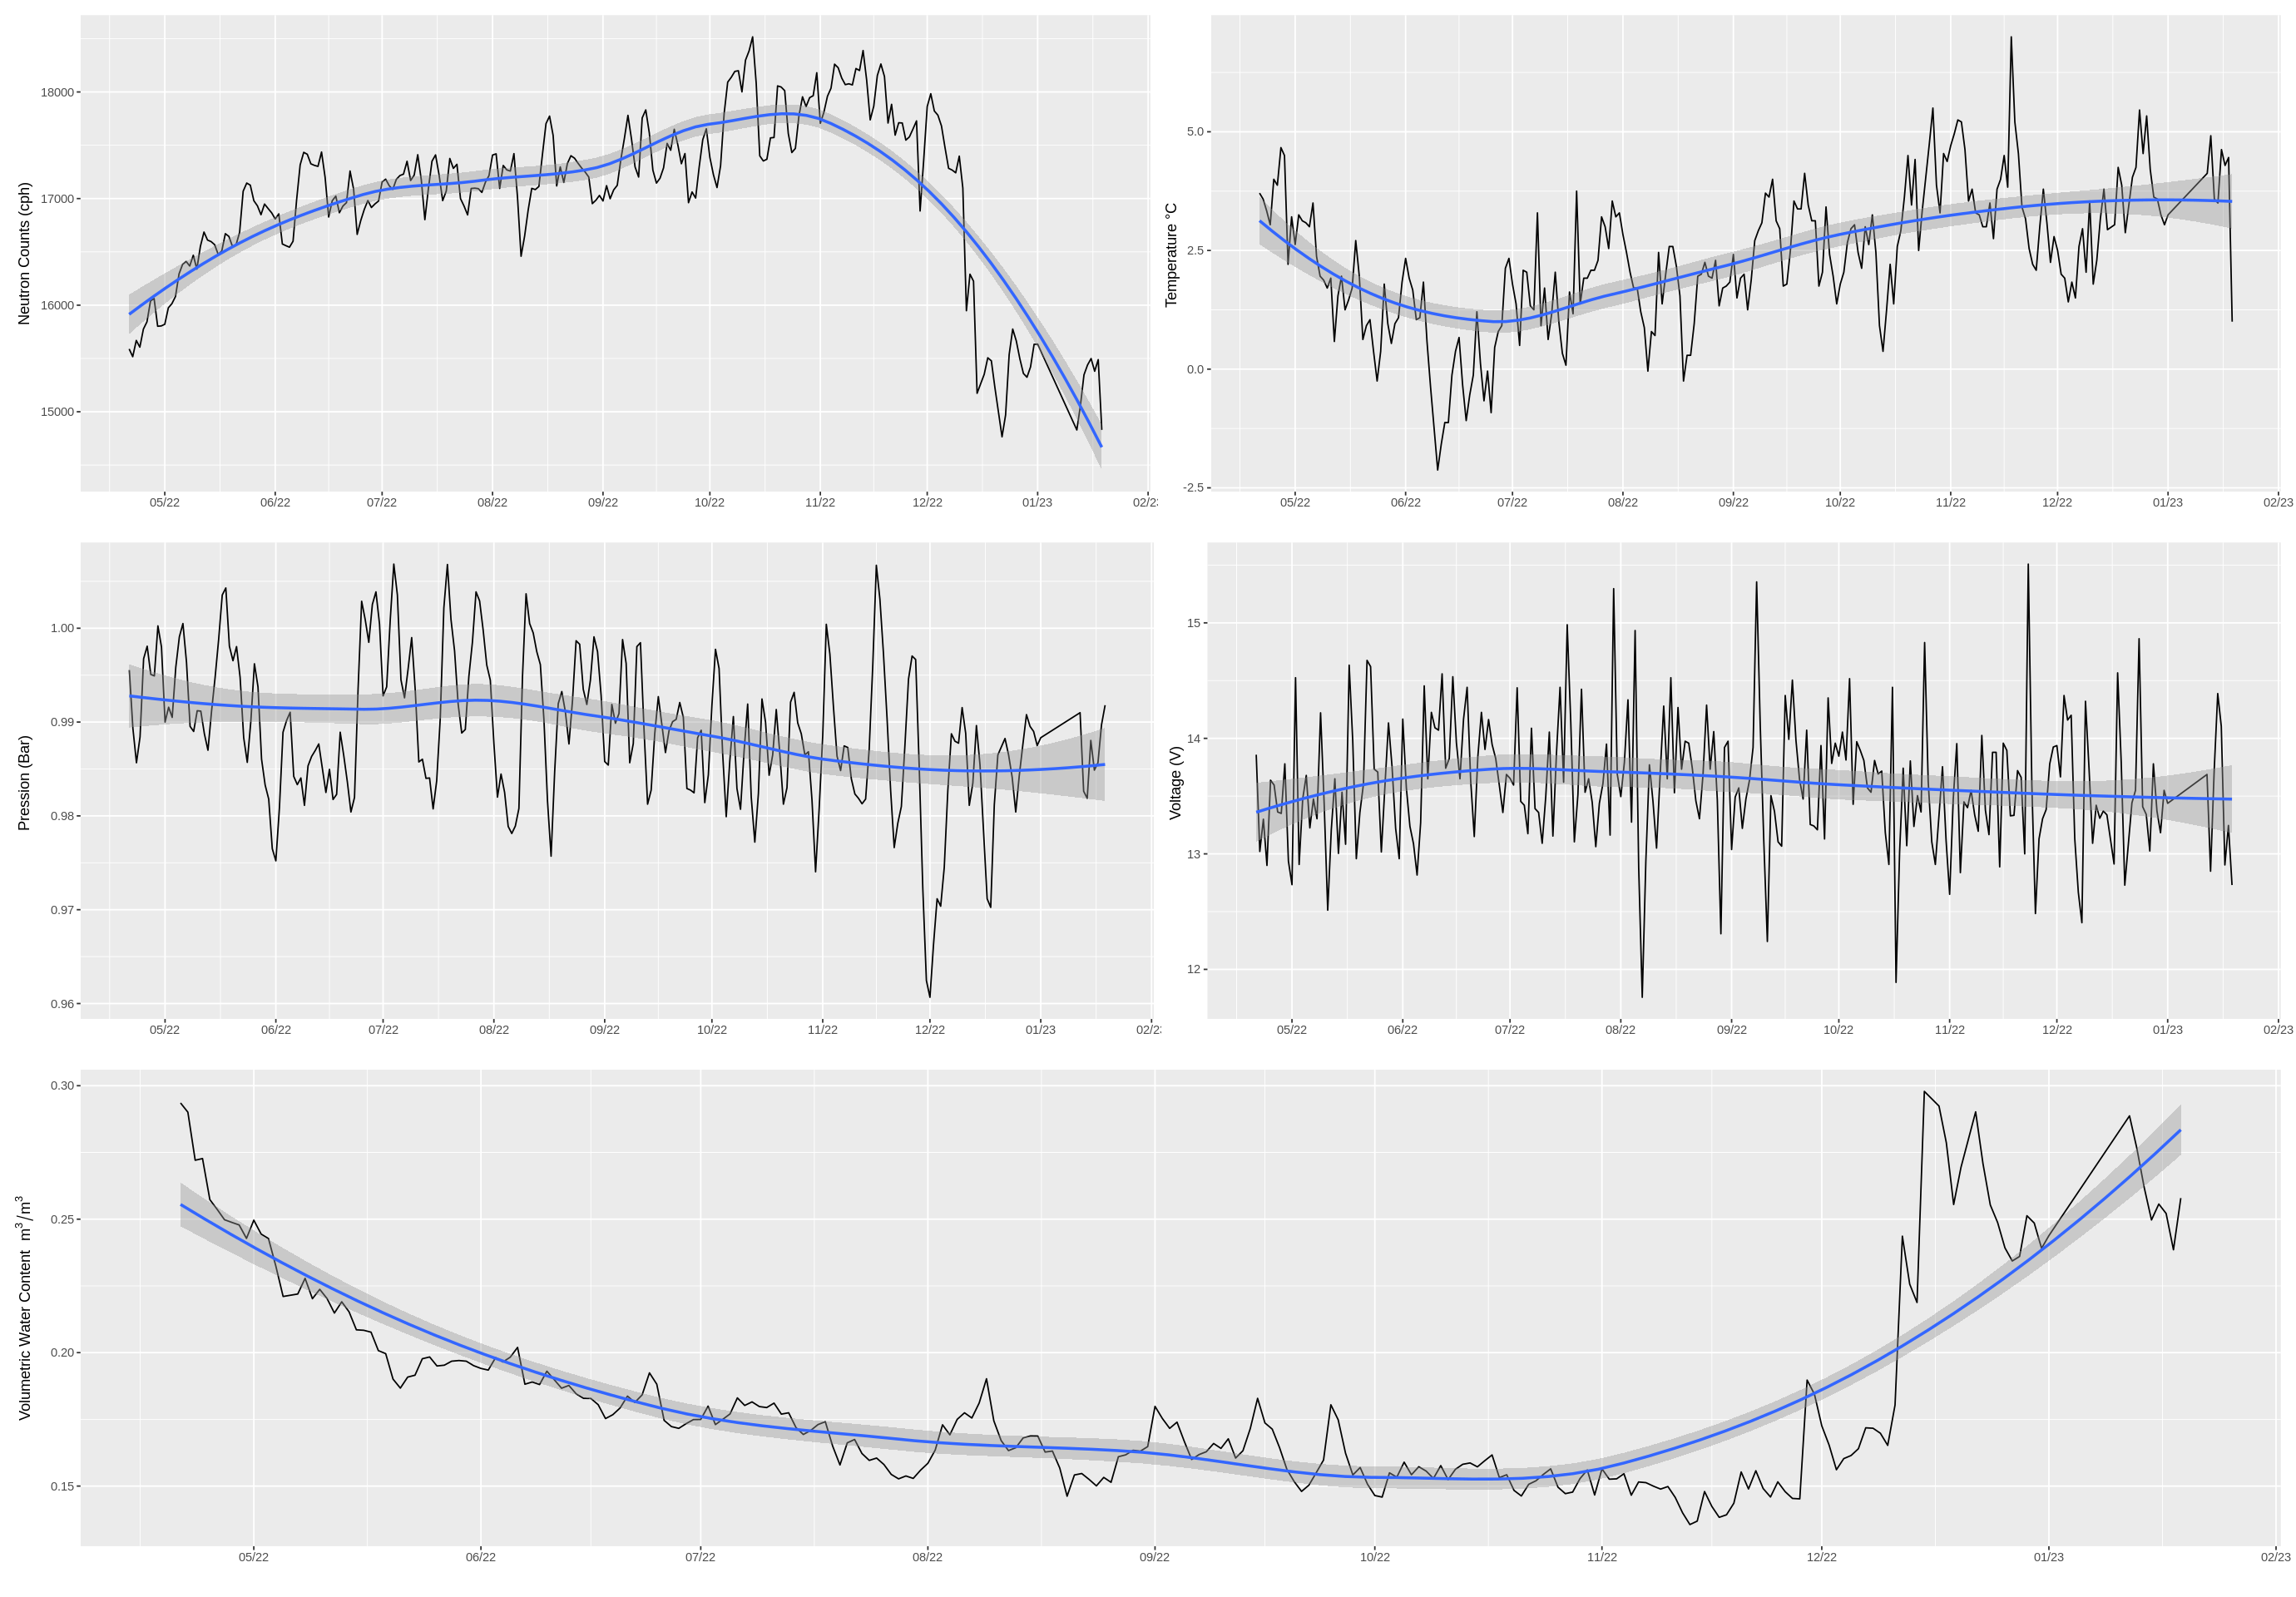

In [30]:
(p21|p23)/(p24|p25)/p26


In [31]:
# MERGING DATASETS --------------------------------------------------------

df.merge<-inner_join(S1,crns, by='UTC')

df.merge


UTC,VV,N1,N2,P1,Battery,H7,P4,T7,NMcounts,fbar,fhum,fsol,VWC
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-05-01,-10.060,15820.83,7561.750,0,12.73333,66.79167,581.6917,2.625000,161.1360,0.9900000,1.020542,0.9866667,0.2496250
2022-05-25,-13.609,17125.96,7603.750,0,13.70833,39.08333,581.7000,0.375000,162.8280,0.9900833,1.010292,0.9764167,0.1983750
2022-06-06,-13.462,16599.58,7637.208,0,13.27083,78.54167,580.9417,1.833333,159.5383,0.9842083,1.023000,0.9964583,0.2019583
2022-06-18,-14.215,17023.00,7452.875,0,14.16667,38.95833,580.6792,-1.083333,155.5209,0.9822917,1.009375,1.0222083,0.1752917
2022-06-30,-14.444,16976.88,7429.708,0,13.68750,34.75000,583.0500,2.333333,157.9276,1.0004583,1.009667,1.0066250,0.1749167
2022-07-12,-13.822,17175.04,7483.083,0,14.05417,37.70833,581.1750,1.166667,158.2239,0.9860417,1.011583,1.0049167,0.1769583
2022-07-24,-14.122,16929.71,7318.667,0,13.44583,34.87500,581.5875,2.083333,152.3689,0.9892083,1.010250,1.0434583,0.1596250
2022-08-05,-13.686,17269.12,7657.792,0,14.93333,60.54167,580.2333,1.708333,158.4773,0.9788750,1.017583,1.0033333,0.1750000
2022-08-17,-13.747,17773.62,7764.750,0,14.26667,31.54167,579.7958,1.541667,158.1801,0.9757083,1.008083,1.0050417,0.1627500


In [32]:


x=df.merge$VV
y=df.merge$VWC


mod  <- lm(y~x)
summary(mod)
b<-mod$coefficients[1]; b
a<-mod$coefficients[2]; a

predicted<- a*x + b
observed<-df.merge$VWC

df.merge$predicted<-predicted




Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025981 -0.012926 -0.003519  0.010830  0.032026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.511961   0.038754  13.211 1.06e-10 ***
x           0.024874   0.002888   8.613 8.43e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01786 on 18 degrees of freedom
Multiple R-squared:  0.8047,	Adjusted R-squared:  0.7939 
F-statistic: 74.18 on 1 and 18 DF,  p-value: 8.432e-08


(Intercept) 
  0.5119612

x 
0.02487382

[1] 0.017

# Regression Analysis 

In [33]:
rmse<-caret::RMSE(observed,predicted)
rmse<-round(rmse,3)
rmse

[1] 0.017

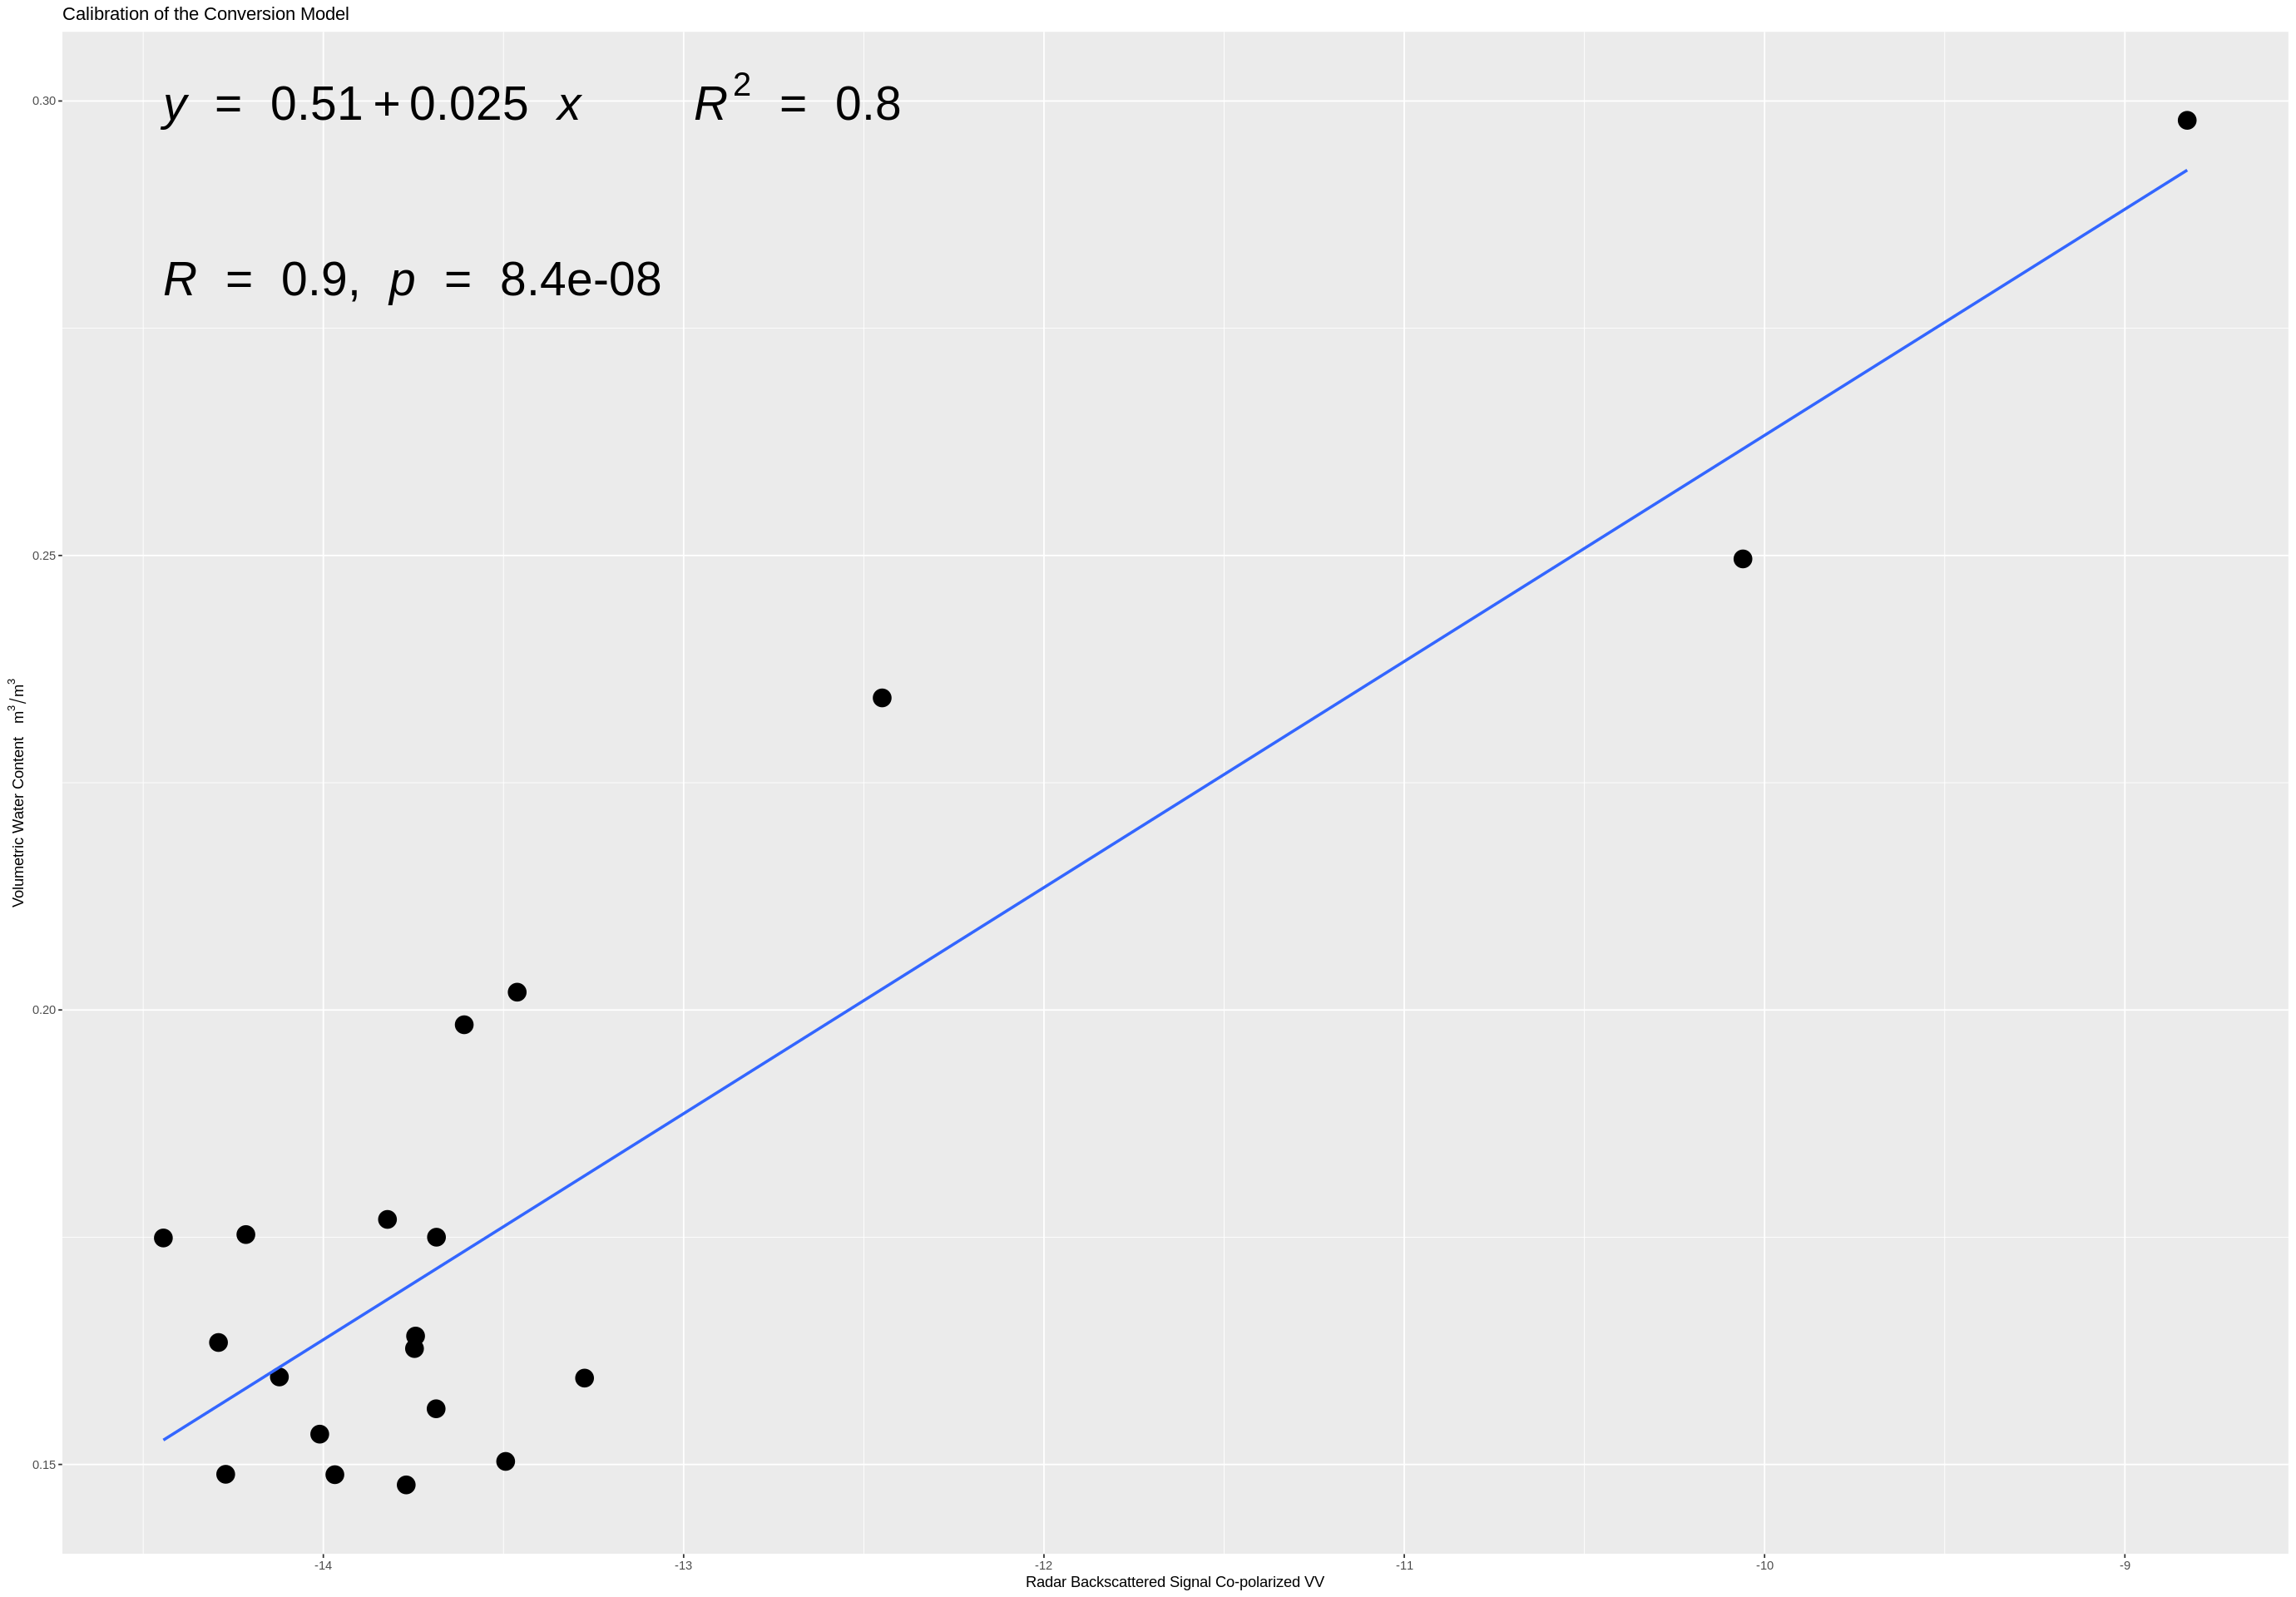

In [36]:
ggplot(df.merge,
       aes(x=VV, y=VWC)) +
  geom_point(size=5.7) +
  labs(title='Calibration of the Conversion Model ',
       x='Radar Backscattered Signal Co-polarized VV',
       y=bquote('Volumetric Water Content '~m^3/m^3))+
  stat_cor(label.y = 0.28, size=12, fontface=2) +
  geom_smooth(method = "lm", formula = y~x,se=F) +
  stat_regline_equation(label.y = c(0.30),size=12,
                        fontface=2,
                        aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~")),
                        formula =  y~x)

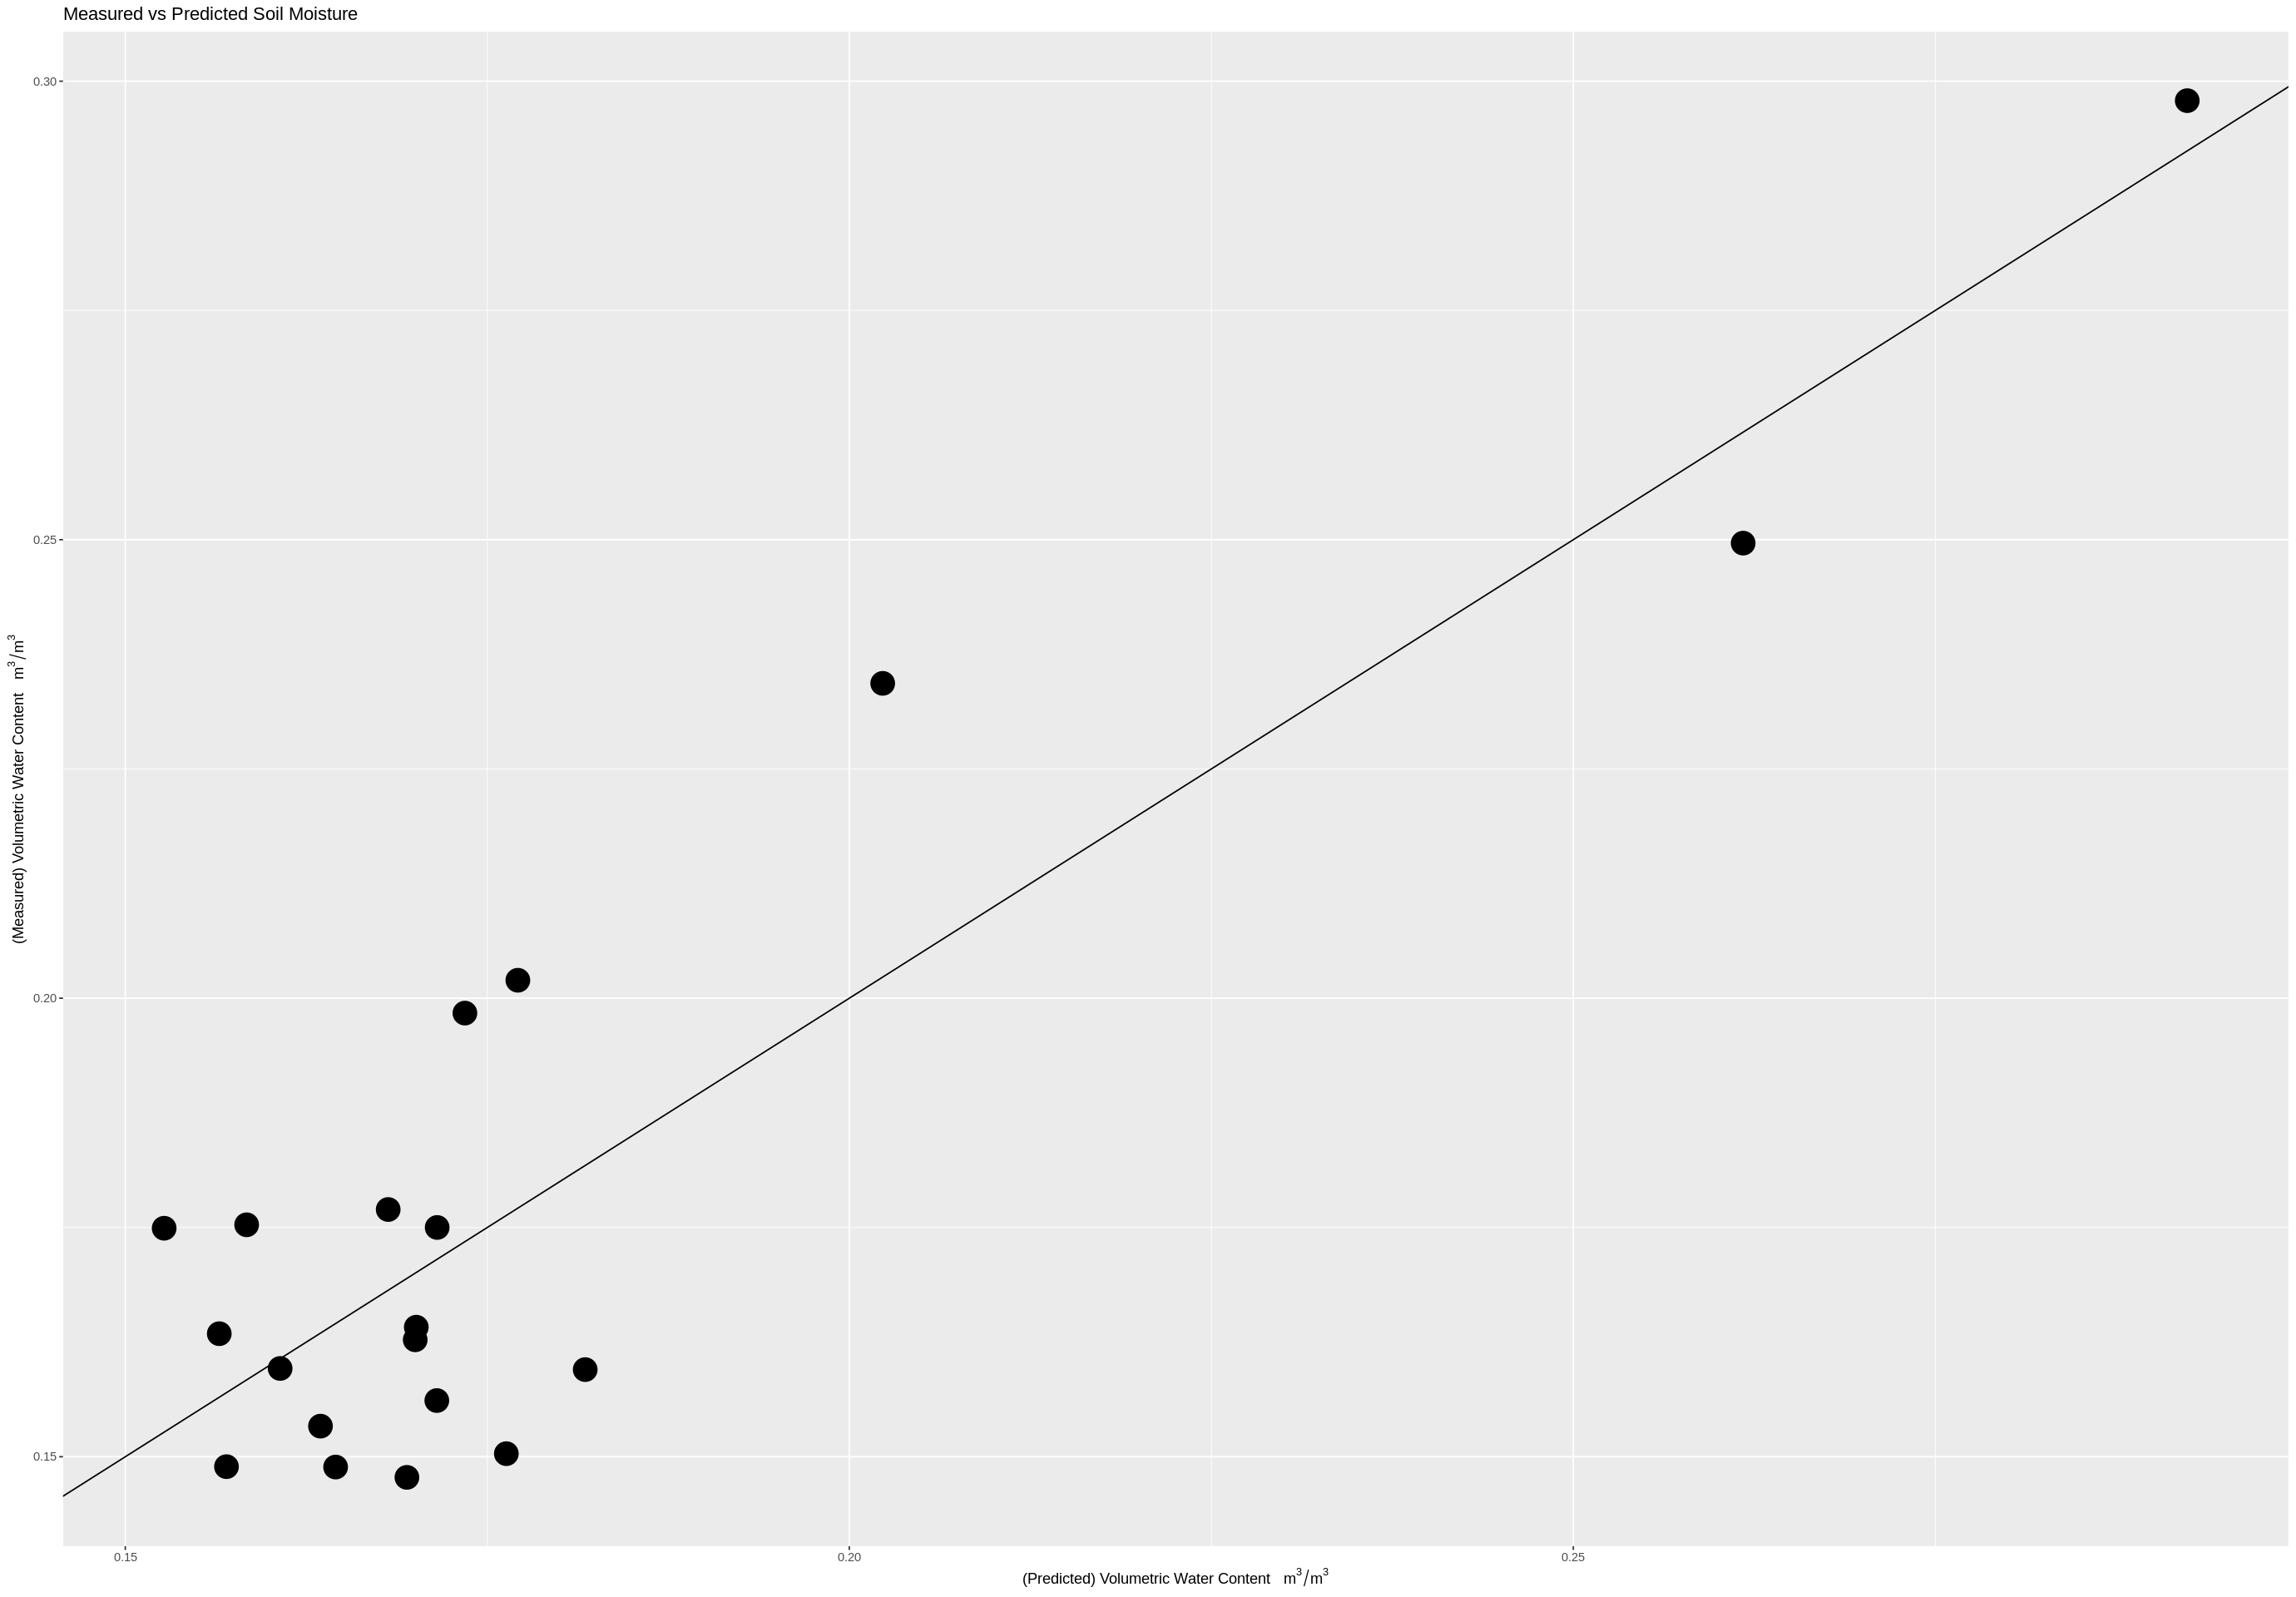

In [39]:
ggplot(df.merge,aes(x=predicted,y=VWC)) +
  geom_point(size=7.7) + 
  labs(title ='Measured vs Predicted Soil Moisture ',
       x=bquote('(Predicted) Volumetric Water Content '~m^3/m^3),
       y=bquote('(Measured) Volumetric Water Content '~m^3/m^3))+
  geom_abline(slope = 1, intercept = 0) 